In [1]:
from gamearg import *
from IPython.display import display, Image

In [2]:
# You only need edit this cell
input_file = "files/plain_wm_graph.lp"
keyword = "game" #arg or game depends on the graphvis_settings.json
reverse = False  # whether you want to reverse the edge direction

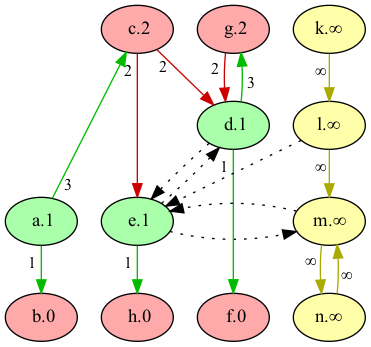

In [3]:
show_wfs(input_file, keyword, reverse)

In [4]:
show_stb(input_file, keyword, reverse)

In [5]:
wfs_stb_pws, df_wfs_stb = node_stb_cal(input_file, keyword, reverse)

In [6]:
df_wfs_stb

,node,state_id,wfs,pw_1,pw_2
0,b,0,lost,lost,lost
1,f,0,lost,lost,lost
2,h,0,lost,lost,lost
3,e,1,won,won,won
4,d,1,won,won,won
5,a,1,won,won,won
6,c,2,lost,lost,lost
7,g,2,lost,lost,lost
8,k,∞,draw,lost,won
9,l,∞,draw,won,lost


In [7]:
count_columns = [col for col in df_wfs_stb.columns if col.startswith('pw_')]
df_wfs_stb['lost_count'] = df_wfs_stb[count_columns].apply(lambda row: sum(row == 'lost'), axis=1)
df_wfs_stb['won_count'] = df_wfs_stb[count_columns].apply(lambda row: sum(row == 'won'), axis=1)
aggregated_counts = df_wfs_stb.groupby('node').agg({'lost_count': 'sum', 'won_count': 'sum'}).reset_index()

aggregated_counts

,node,lost_count,won_count
0,a,0,2
1,b,2,0
2,c,2,0
3,d,0,2
4,e,0,2
5,f,2,0
6,g,2,0
7,h,2,0
8,k,1,1
9,l,1,1
